In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df_rand = pd.read_csv('exp1random.csv', delimiter=';')
df_comp = pd.read_csv('exp1complete.csv', delimiter=';')
df_spar = pd.read_csv('exp1sparse.csv', delimiter=';')

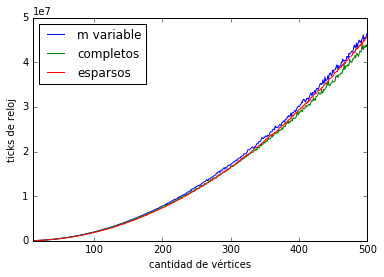

In [3]:
ax = plt.gca()
# Plotting random graphs
title_label = ('m variable')
for title, group in df_rand.groupby('modo'):
    group = group.groupby('vertices').median().reset_index()
    group.plot(x='vertices', y='duracion', label=title_label, ax=ax)
plt.ylabel('ticks de reloj')
plt.xlabel('cantidad de vértices')

# Plotting complete graphs
title_label2 = ('completos')
for title, group in df_comp.groupby('modo'):
    group = group.groupby('vertices').median().reset_index()
    group.plot(x='vertices', y='duracion', label=title_label2, ax=ax)
plt.ylabel('ticks de reloj')
plt.xlabel('cantidad de vértices')

title_label3 = ('esparsos')
for title, group in df_spar.groupby('modo'):
    group = group.groupby('vertices').median().reset_index()
    group.plot(x='vertices', y='duracion', label=title_label3, ax=ax)
plt.ylabel('ticks de reloj')
plt.xlabel('cantidad de vértices')


plt.show()

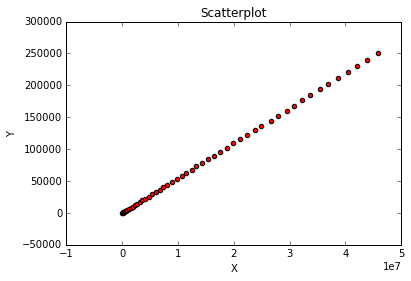

In [4]:
exp = group['duracion']
t = np.arange(10,501)
tcuad = t**2
tcub = t**3
tcuart = t**4

tran = t**1.75

plt.title('Scatterplot')
plt.xlabel('X')
plt.ylabel('Y')
for index in range(0,len(exp), 10):
    plt.scatter(exp[index], tcuad[index], c = 'red')

plt.show()

In [5]:
print("Coeficientes de pearson para versión completos")
for title, group in df_comp.groupby('modo'):
    group = group.groupby('vertices').median().reset_index()
    group.plot(x='vertices', y='duracion', label=title_label, ax=ax)

t = np.arange(10,501)
tnlogn = []

for i in range(0, len(t)):
    tnlogn.append(math.log(t[i], 10))

lin = np.corrcoef(group['duracion'], t)[0,1]
supralin = np.corrcoef(group['duracion'], t**1.75)[0,1] 
cuad = np.corrcoef(group['duracion'], t**2)[0,1]
cub = np.corrcoef(group['duracion'], t**3)[0,1]
cuart = np.corrcoef(group['duracion'], t**4)[0,1]
nlogn = np.corrcoef(group['duracion'], tnlogn)[0,1]
print(lin)
print(supralin)
print(cuad)
print(cub)
print(cuart)
print(nlogn)

print(str(round(lin,6)) + " & " + str(round(supralin,6)) + " & " + str(round(cuad,6)) + " & " + str(round(cub,6)) + " & " + str(round(cuart,6)) + " & " + str(round(nlogn,6)) )



Coeficientes de pearson para versión completos
0.973507592303
0.999148835052
0.999791528517
0.984016967419
0.955396709396
0.818443347498
0.973508 & 0.999149 & 0.999792 & 0.984017 & 0.955397 & 0.818443


In [6]:
print("Coeficientes de pearson para versión esparsos")
for title, group in df_spar.groupby('modo'):
    group = group.groupby('vertices').median().reset_index()
    group.plot(x='vertices', y='duracion', label=title_label, ax=ax)
#print(group)
t = np.arange(10,501)
tnlogn = []

for i in range(0, len(t)):
    tnlogn.append(math.log(t[i], 10))

lin = np.corrcoef(group['duracion'], t)[0,1]
supralin = np.corrcoef(group['duracion'], t**1.75)[0,1] 
cuad = np.corrcoef(group['duracion'], t**2)[0,1]
cub = np.corrcoef(group['duracion'], t**3)[0,1]
cuart = np.corrcoef(group['duracion'], t**4)[0,1]
nlogn = np.corrcoef(group['duracion'], tnlogn)[0,1]

print(lin)
print(supralin)
print(cuad)
print(cub)
print(cuart)
print(nlogn)

#print(round(lin, 2))
print(str(round(lin,6)) + " & " + str(round(supralin,6)) + " & " + str(round(cuad,6)) + " & " + str(round(cub,6)) + " & " + str(round(cuart,6)) + " & " + str(round(nlogn,6)) )


Coeficientes de pearson para versión esparsos
0.970619960296
0.99867598128
0.999976644564
0.986185803687
0.958785231461
0.812014885602
0.97062 & 0.998676 & 0.999977 & 0.986186 & 0.958785 & 0.812015


In [7]:
print("Coeficientes de pearson para versión random")
for title, group in df_rand.groupby('modo'):
    group = group.groupby('vertices').median().reset_index()
    group.plot(x='vertices', y='duracion', label=title_label, ax=ax)
#print(group)
t = np.arange(10,501)
tnlogn = []

for i in range(0, len(t)):
    tnlogn.append(math.log(t[i], 10))

lin = np.corrcoef(group['duracion'], t)[0,1]
supralin = np.corrcoef(group['duracion'], t**1.75)[0,1] 
cuad = np.corrcoef(group['duracion'], t**2)[0,1]
cub = np.corrcoef(group['duracion'], t**3)[0,1]
cuart = np.corrcoef(group['duracion'], t**4)[0,1]
nlogn = np.corrcoef(group['duracion'], tnlogn)[0,1]

print(lin)
print(supralin)
print(cuad)
print(cub)
print(cuart)
print(nlogn)

#print(round(lin, 2))
print(str(round(lin,6)) + " & " + str(round(supralin,6)) + " & " + str(round(cuad,6)) + " & " + str(round(cub,6)) + " & " + str(round(cuart,6)) + " & " + str(round(nlogn,6)) )


Coeficientes de pearson para versión random
0.972782695786
0.999053841457
0.999843032257
0.984418788501
0.955908392021
0.816558580244
0.972783 & 0.999054 & 0.999843 & 0.984419 & 0.955908 & 0.816559


In [8]:
from scipy.stats import pearsonr
pearsonr(exp, tcuad)

(0.99997664456362723, 0.0)

In [9]:
print("Calculando densidad de grafos esparsos")
m = df_spar['aristas']
n = df_spar['vertices']
d = 2*m/(n*(n-1))
print("Min: " + str(min(d)))
print("Máxima  densidad: "+ str(max(d)))
print("Mínima  densidad: "+ str(min(d)))
print("Media   densidad: "+ str(d.mean()))
print("Mediana densidad: "+ str(d.median()))

Calculando densidad de grafos esparsos
Máxima  densidad: 0.266666666667
Mínima  densidad: 0.0455696202532
Media   densidad: 0.0783306444432
Mediana densidad: 0.07797781414802692


In [10]:
print("Calculando densidad de grafos random")
m = df_rand['aristas']
n = df_rand['vertices']
d = 2*m/(n*(n-1))
print("Máxima  densidad: "+ str(max(d)))
print("Mínima  densidad: "+ str(min(d)))
print("Media   densidad: "+ str(d.mean()))
print("Mediana densidad: "+ str(d.median()))

Calculando densidad de grafos random
Máxima  densidad: 1.0
Mínima  densidad: 0.0455174800969
Media   densidad: 0.529785610891
Mediana densidad: 0.5286195286195287
